# My, what big ~~teeth~~ features you have!

I recently completed an AI/ML course through VetsinTech with Michael Galarnyk. He stressed that the most important feature is feature engineering. The idea itself is easy enough to grasp. Just make more features. Ok, but what is it exactly? How does linear algebra come into play? Too often it seems learning all there is to know about AI/ML, it is put into various silo's when it comes to learning. Yes, there is linear algebra, calculus, python programming, statistics, probability, etc. But, what often occurs is not showing the inter-relationships between those things. Frustrating. At least for me. So, that what I hope to do here. Take a little slice of learning about machine learning, and show some relationships.

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

I'll be using stock data for this as it is easy to understand, the data is freely avaible, and only take five features explains it.
Here is the master dataframe we'll be using and carving up as need be to demonstrate how feature engineering can enhance our models outcome. Stock data is from yahoo finance, while the earnings per share (EPS) is from AlphaVantage. The dataset was started in 2007 as the earnings data before then had missing data.

Just to ensure we're all on the same page, some simple definitions. **Open** = stock price at the opening of the day. **High** = stocks high price of the day. **Low** = low price of the day. **Close** = the day's closing price. **Volume** = number of shares traded that day. **O/C** = open divided by close. **H/C** = high/close. **L/C** = low/close. **reportedEPS** = what Apple, Inc. reported as their Earnings Per Share (EPS) for that quarter. **estimatedEPS** = analyst estimate, **surprise** = difference between reported and estimated EPS in cents per share, **surprisePercentage** = percentage difference, **rEPS/C** = reportedEPS/Close, **estEPS/C** = estimatedEPS/Close, **surEPS/Close** = surpriseEPS/Close, **sP/C** = surprisePercentage/Close.

The columns with the division sign '/', are ratio's I added that are derived from other columns.

In [3]:
df = pd.read_csv('Data/AAPL_price_eps_ratios_art.csv', index_col='Date')
df

,Open,High,Low,Close,Volume,O/C,H/C,L/C,reportedEPS,estimatedEPS,surprise,surprisePercentage,rEPS/C,estEPS/C,surEPS/C,sP/C
Date,,,,,,,,,,,,,,,,
2/5/2024,188.1500,189.2500,185.8400,187.6800,69668800,1.00250,1.0084,0.9902,2.02,1.93,0.09,4.6632,0.0108,0.0103,0.0005,0.0248
2/2/2024,179.8600,187.3300,179.2500,185.8500,102518000,0.96777,1.0080,0.9645,2.02,1.93,0.09,4.6632,0.0109,0.0104,0.0005,0.0251
2/1/2024,183.9900,186.9500,183.8200,186.8600,64885400,0.98464,1.0005,0.9837,2.02,1.93,0.09,4.6632,0.0108,0.0103,0.0005,0.0250
1/31/2024,187.0400,187.1000,184.3500,184.4000,55467800,1.01432,1.0146,0.9997,1.46,1.39,0.07,5.0360,0.0079,0.0075,0.0004,0.0273
1/30/2024,190.9400,191.8000,187.4700,188.0400,55859400,1.01542,1.0200,0.9970,1.46,1.39,0.07,5.0360,0.0078,0.0074,0.0004,0.0268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.0618,3.1254,3.0539,2.5945,1207424400,1.18010,1.2046,1.1771,0.04,0.03,0.01,33.3333,0.0154,0.0116,0.0039,12.8477
1/22/2007,3.1836,3.1843,3.0589,2.6275,1454026000,1.21163,1.2119,1.1642,0.04,0.03,0.01,33.3333,0.0152,0.0114,0.0038,12.6863
1/19/2007,3.1654,3.2018,3.1471,2.6793,1364473600,1.18142,1.1950,1.1746,0.04,0.03,0.01,33.3333,0.0149,0.0112,0.0037,12.4412


In [4]:
#Shifting Close price in Tomorrow column to prevent model knowing the same day closing price, pevents overfitting. Target is what is being predicted 0=price decrease, 1=price increase.
df['Tomorrow'] = df['Close'].shift(-1)
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)
df

,Open,High,Low,Close,Volume,O/C,H/C,L/C,reportedEPS,estimatedEPS,surprise,surprisePercentage,rEPS/C,estEPS/C,surEPS/C,sP/C,Tomorrow,Target
Date,,,,,,,,,,,,,,,,,,
2/5/2024,188.1500,189.2500,185.8400,187.6800,69668800,1.00250,1.0084,0.9902,2.02,1.93,0.09,4.6632,0.0108,0.0103,0.0005,0.0248,185.8500,0
2/2/2024,179.8600,187.3300,179.2500,185.8500,102518000,0.96777,1.0080,0.9645,2.02,1.93,0.09,4.6632,0.0109,0.0104,0.0005,0.0251,186.8600,1
2/1/2024,183.9900,186.9500,183.8200,186.8600,64885400,0.98464,1.0005,0.9837,2.02,1.93,0.09,4.6632,0.0108,0.0103,0.0005,0.0250,184.4000,0
1/31/2024,187.0400,187.1000,184.3500,184.4000,55467800,1.01432,1.0146,0.9997,1.46,1.39,0.07,5.0360,0.0079,0.0075,0.0004,0.0273,188.0400,1
1/30/2024,190.9400,191.8000,187.4700,188.0400,55859400,1.01542,1.0200,0.9970,1.46,1.39,0.07,5.0360,0.0078,0.0074,0.0004,0.0268,191.7300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.0618,3.1254,3.0539,2.5945,1207424400,1.18010,1.2046,1.1771,0.04,0.03,0.01,33.3333,0.0154,0.0116,0.0039,12.8477,2.6275,1
1/22/2007,3.1836,3.1843,3.0589,2.6275,1454026000,1.21163,1.2119,1.1642,0.04,0.03,0.01,33.3333,0.0152,0.0114,0.0038,12.6863,2.6793,1
1/19/2007,3.1654,3.2018,3.1471,2.6793,1364473600,1.18142,1.1950,1.1746,0.04,0.03,0.01,33.3333,0.0149,0.0112,0.0037,12.4412,2.6965,1


So, let's start with the bare bones minimum of stock data only.

## Subset of df

In [5]:
# Baseline dataframe
df_ohlcv = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Target']]
df_ohlcv

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2/5/2024,188.1500,189.2500,185.8400,187.6800,69668800,0
2/2/2024,179.8600,187.3300,179.2500,185.8500,102518000,1
2/1/2024,183.9900,186.9500,183.8200,186.8600,64885400,0
1/31/2024,187.0400,187.1000,184.3500,184.4000,55467800,1
1/30/2024,190.9400,191.8000,187.4700,188.0400,55859400,1
...,...,...,...,...,...,...
1/23/2007,3.0618,3.1254,3.0539,2.5945,1207424400,1
1/22/2007,3.1836,3.1843,3.0589,2.6275,1454026000,1
1/19/2007,3.1654,3.2018,3.1471,2.6793,1364473600,1


Here's a slice of data representing the vector space. We'll return to this later to see what has changed.

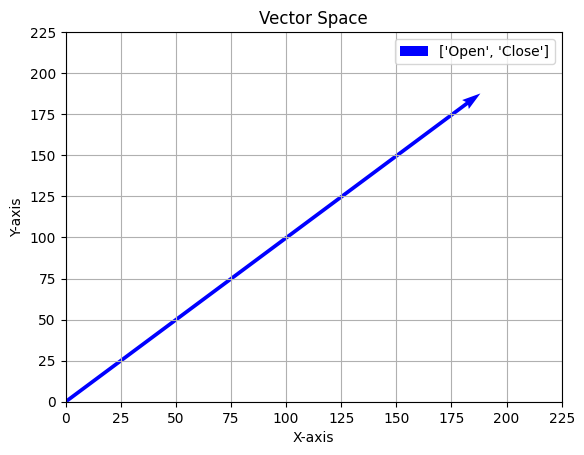

In [102]:
# Define the data for the Open and Close
x = [0]  # Starting point for the vectors
y = [0]
Open = [188.1500]  # Magnitude of the vectors along x-axis
Close = [187.6800]  # Magnitude of the vectors along y-axis

# Plot the vectors
plt.quiver(x, y, Open, Close, angles='xy', scale_units='xy', scale=1, color=['b', 'r'], label=['Open', 'Close'])

# Plot limits
plt.xlim(0, 225)
plt.ylim(0, 225)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vector Space")

plt.legend()

plt.grid()
plt.show()

We'll use a Random Forrest Classifier as the Target is binary and RFC's can look for non-linear relationships in the data.

# Baseline RFC

In [8]:
# Establishing a baseline.
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=100)

train = df_ohlcv.iloc[:-500]
test = df_ohlcv.iloc[-500:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
rfc.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100)

In [9]:
preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [10]:
precision_score(test['Target'], preds) * 100

51.85185185185185

Not too impressive. Or, as Josh Starmer migh say, 'tiny bam'. So, let's add some more features and see what happens.

## Adding the Earings Per Share (EPS) Columns to our model.

Much has been said about the importance of a stocks earnings and its influence on share price. But does it really? Not to mention that we're adding more features. More = better...it's the Amercian way.

In [11]:
df_ohlcv_EPS = df[['Open', 'High', 'Low', 'Close', 'Volume', 'reportedEPS',	'estimatedEPS',	'surprise', 'surprisePercentage', 'Target']]
df_ohlcv_EPS

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage,Target
Date,,,,,,,,,,
2/5/2024,188.1500,189.2500,185.8400,187.6800,69668800,2.02,1.93,0.09,4.6632,0
2/2/2024,179.8600,187.3300,179.2500,185.8500,102518000,2.02,1.93,0.09,4.6632,1
2/1/2024,183.9900,186.9500,183.8200,186.8600,64885400,2.02,1.93,0.09,4.6632,0
1/31/2024,187.0400,187.1000,184.3500,184.4000,55467800,1.46,1.39,0.07,5.0360,1
1/30/2024,190.9400,191.8000,187.4700,188.0400,55859400,1.46,1.39,0.07,5.0360,1
...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.0618,3.1254,3.0539,2.5945,1207424400,0.04,0.03,0.01,33.3333,1
1/22/2007,3.1836,3.1843,3.0589,2.6275,1454026000,0.04,0.03,0.01,33.3333,1
1/19/2007,3.1654,3.2018,3.1471,2.6793,1364473600,0.04,0.03,0.01,33.3333,1


In [12]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=100)

train = df_ohlcv_EPS.iloc[:-500]
test = df_ohlcv_EPS.iloc[-500:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'reportedEPS',	'estimatedEPS',	'surprise', 'surprisePercentage']
rfc.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100)

In [13]:
preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [14]:
precision_score(test['Target'],preds) * 100

48.24742268041237

It did worse?! With some hacking, i.e., repeatedly running the classifier, we could get the score slightly higher, but you get the idea.

# Feature Engineering

Having the highlest quality data possible is important, but once you have it, then what? Feature engineering, that's what. As the previous two RFC's run demonstrated, high quality data was used, and got ho-hum results. There's no relationship between each feature, they're stove-piped in a sense. Feature engineering provides that relationship. It looks at the same data in a different way. This is where linear algebra makes an entrance. In Jorge Brasil's book "Before Machine Learning" in section 3.4 he writes about the vector space and basis. The basis here is the variable **df_ohlcv**, or **df_ohlcv_EPS** take your choice. Once the ratio columns are added (see below) the ML model's perspective has changed. Same data, new view. I equated this to when I was learning fine art where it is common to look at a painting/ drawing under contruction by turning the picture upside down or facing away from the picture and using a mirror to observe the picture in a different way. That is done because staring at the same picture for days or weeks on end we become blind to the subtle flaws right in front of us. Often the flaw was immediately apparent when the view changed.

## Adding ratio columns O/C, H/C, L/C.

Here, I've added three new columns, taking the Open, High, and Low price and dividing them by the closing price.

In [15]:
df_ohlcv_OHL = df[['Open', 'High', 'Low', 'Close', 'Volume', 'reportedEPS',	'estimatedEPS',	'surprise', 'surprisePercentage', 'O/C', 'H/C', 'L/C', 'Target']]
df_ohlcv_OHL

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage,O/C,H/C,L/C,Target
Date,,,,,,,,,,,,,
2/5/2024,188.1500,189.2500,185.8400,187.6800,69668800,2.02,1.93,0.09,4.6632,1.00250,1.0084,0.9902,0
2/2/2024,179.8600,187.3300,179.2500,185.8500,102518000,2.02,1.93,0.09,4.6632,0.96777,1.0080,0.9645,1
2/1/2024,183.9900,186.9500,183.8200,186.8600,64885400,2.02,1.93,0.09,4.6632,0.98464,1.0005,0.9837,0
1/31/2024,187.0400,187.1000,184.3500,184.4000,55467800,1.46,1.39,0.07,5.0360,1.01432,1.0146,0.9997,1
1/30/2024,190.9400,191.8000,187.4700,188.0400,55859400,1.46,1.39,0.07,5.0360,1.01542,1.0200,0.9970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.0618,3.1254,3.0539,2.5945,1207424400,0.04,0.03,0.01,33.3333,1.18010,1.2046,1.1771,1
1/22/2007,3.1836,3.1843,3.0589,2.6275,1454026000,0.04,0.03,0.01,33.3333,1.21163,1.2119,1.1642,1
1/19/2007,3.1654,3.2018,3.1471,2.6793,1364473600,0.04,0.03,0.01,33.3333,1.18142,1.1950,1.1746,1


Rinse and repeat the previous RFC and precision score.

In [15]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=100)

train = df_ohlcv_OHL.iloc[:-500]
test = df_ohlcv_OHL.iloc[-500:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'O/C',	'H/C', 'L/C']
rfc.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100)

In [16]:
preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test['Target'], preds) * 100

85.02202643171806

'BAM'! Or, maybe even a 'Double BAM!!' Now, we are getting somewhere. I think the increase speaks for itself. Without this simple feature engineering enhancement we would have be left racking our brains trying to hack the heck out of the model when, as mentioned before, the data is most important. Or, rather the re-interpretation of the data that is more indicative of the relationship between each feature. Let's keep going.

## Visualizing the change

To show what happened visually when the ratio columns were added the data needs to be normalized due to the large difference between the Open, Close and O/C scalars. Another reason to use RFC, trees don't care about normalization.

In [128]:
# Normalize the first row of data. But will only be plotting Open Close and O/C.
df_normal = df_ohlcv_OHL.iloc[0:1, 0:-1]

# Min-Max scaling
min_val = np.min(df_normal)
max_val = np.max(df_normal)
scaled_data = (df_normal - min_val) / (max_val - min_val)

scaled_data

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,surprisePercentage,O/C,H/C,L/C
Date,,,,,,,,,,,,
2/5/2024,0.000003,0.000003,0.000003,0.000003,1.0,2.770250e-08,2.641067e-08,0.0,6.564201e-08,1.309769e-08,1.318237e-08,1.292114e-08


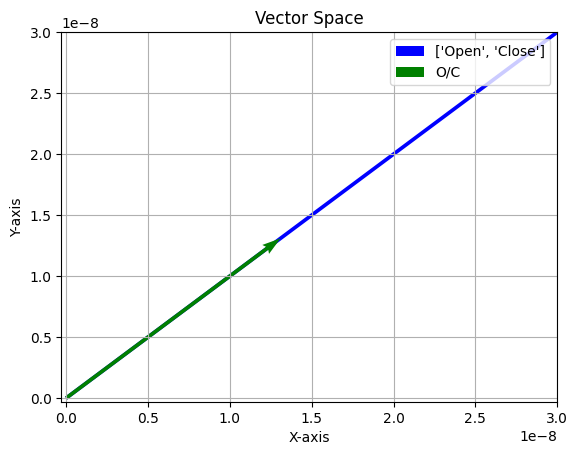

In [134]:
# Define the data for the original vectors
x = [0]  # Starting point for the vectors
y = [0]
Open = [0.000003]  # Magnitude of the original vector along x-axis
Close = [0.000003]  # Magnitude of the original vector along y-axis

# Define the data for the new vector (O/C)
oc_ratio = 1.309769e-08
oc_dx = [Open[0] / Close[0] * oc_ratio]  # Magnitude of the new vector along x-axis
oc_Close = [oc_ratio]  # Magnitude of the new vector along y-axis

# Plot the original vectors using plt.quiver
plt.quiver(x, y, Open, Close, angles='xy', scale_units='xy', scale=1, color=['b', 'r'], label=['Open', 'Close'])

# Plot the new vector (O/C)
plt.quiver(x, y, oc_dx, oc_Close, angles='xy', scale_units='xy', scale=1, color='g', label='O/C')

# Calculate the maximum magnitude of all vectors for scaling the plot
max_magnitude = max(max(Open), max(Close), max(oc_dx), max(oc_Close))

# Set plot limits with some buffer space
plt.xlim(-0.0001 * max_magnitude, 0.01 * max_magnitude)
plt.ylim(-0.0001 * max_magnitude, 0.01 * max_magnitude)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Vector Space")

plt.legend()

plt.grid()
plt.show()

The O/C ratio vector is a change in the vector space, representing a new direction or dimension based on the relationship between the "Open" and "Close" values. It's not just a new plot point but a fundamental alteration in the space's structure. Cool huh?

## Adding all columns for our model to use.

Feature engineer everything! Well, yes you can but diminishing returns come into play. More features are better generally speaking, but some features are more impactful than others. Everything cannot be of equal importance. Too much random seasoning spoils the dish. We want the **right** seasoning. And, that is where Principle Component Analysis (PCA), another linear algebra/ machine learning concept comes into play. But, that is for another article.

In [32]:
df_all_cols = df[['Open', 'High', 'Low', 'Close', 'Volume', 'reportedEPS',	'estimatedEPS',	'surprise', 'rEPS/C', 'estEPS/C', 'surEPS/C', 'sP/C', 'surprisePercentage', 'O/C', 'H/C', 'L/C', 'Target']]
df_all_cols

,Open,High,Low,Close,Volume,reportedEPS,estimatedEPS,surprise,rEPS/C,estEPS/C,surEPS/C,sP/C,surprisePercentage,O/C,H/C,L/C,Target
Date,,,,,,,,,,,,,,,,,
2/5/2024,188.1500,189.2500,185.8400,187.6800,69668800,2.02,1.93,0.09,0.0108,0.0103,0.0005,0.0248,4.6632,1.00250,1.0084,0.9902,0
2/2/2024,179.8600,187.3300,179.2500,185.8500,102518000,2.02,1.93,0.09,0.0109,0.0104,0.0005,0.0251,4.6632,0.96777,1.0080,0.9645,1
2/1/2024,183.9900,186.9500,183.8200,186.8600,64885400,2.02,1.93,0.09,0.0108,0.0103,0.0005,0.0250,4.6632,0.98464,1.0005,0.9837,0
1/31/2024,187.0400,187.1000,184.3500,184.4000,55467800,1.46,1.39,0.07,0.0079,0.0075,0.0004,0.0273,5.0360,1.01432,1.0146,0.9997,1
1/30/2024,190.9400,191.8000,187.4700,188.0400,55859400,1.46,1.39,0.07,0.0078,0.0074,0.0004,0.0268,5.0360,1.01542,1.0200,0.9970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/2007,3.0618,3.1254,3.0539,2.5945,1207424400,0.04,0.03,0.01,0.0154,0.0116,0.0039,12.8477,33.3333,1.18010,1.2046,1.1771,1
1/22/2007,3.1836,3.1843,3.0589,2.6275,1454026000,0.04,0.03,0.01,0.0152,0.0114,0.0038,12.6863,33.3333,1.21163,1.2119,1.1642,1
1/19/2007,3.1654,3.2018,3.1471,2.6793,1364473600,0.04,0.03,0.01,0.0149,0.0112,0.0037,12.4412,33.3333,1.18142,1.1950,1.1746,1


In [43]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=100)

train = df_all_cols.iloc[:-500]
test = df_all_cols.iloc[-500:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'reportedEPS',	'estimatedEPS',	'surprise', 'rEPS/C', 'estEPS/C', 'surEPS/C', 'sP/C', 'surprisePercentage', 'O/C', 'H/C', 'L/C']
rfc.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100)

In [44]:
preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [45]:
precision_score(test['Target'], preds) * 100

80.63241106719367

Seems as if we have hit a sort of upper limit. That's not a bad thing. We have some idea of what our left and right limits are. Let's do one more run, but this time with out the baseline stock data i.e. Open, High, Low, Close, and Volume.

## Final spin cycle. Ratio's only.

In [38]:
df_ratios = df[['O/C', 'H/C', 'L/C', 'rEPS/C', 'estEPS/C', 'surEPS/C', 'sP/C', 'Target']]
df_ratios

,O/C,H/C,L/C,rEPS/C,estEPS/C,surEPS/C,sP/C,Target
Date,,,,,,,,
2/5/2024,1.00250,1.0084,0.9902,0.0108,0.0103,0.0005,0.0248,0
2/2/2024,0.96777,1.0080,0.9645,0.0109,0.0104,0.0005,0.0251,1
2/1/2024,0.98464,1.0005,0.9837,0.0108,0.0103,0.0005,0.0250,0
1/31/2024,1.01432,1.0146,0.9997,0.0079,0.0075,0.0004,0.0273,1
1/30/2024,1.01542,1.0200,0.9970,0.0078,0.0074,0.0004,0.0268,1
...,...,...,...,...,...,...,...,...
1/23/2007,1.18010,1.2046,1.1771,0.0154,0.0116,0.0039,12.8477,1
1/22/2007,1.21163,1.2119,1.1642,0.0152,0.0114,0.0038,12.6863,1
1/19/2007,1.18142,1.1950,1.1746,0.0149,0.0112,0.0037,12.4412,1


In [51]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=100)

train = df_all_cols.iloc[:-500]
test = df_all_cols.iloc[-500:]

predictors = ['rEPS/C', 'estEPS/C', 'surEPS/C', 'sP/C', 'O/C', 'H/C', 'L/C']
rfc.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100)

In [52]:
preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [53]:
precision_score(test['Target'], preds) * 100

71.23287671232876

Not the strongest score, but still much better than our base score at the outset, and none of the original data was used. This does not necessarily mean we should always throw out the raw data, but it does demonstrate the power of feature engineering and how it can help our cause, and not just rely on model tweaking to do the heavy lifting.